# Model 400 basicSa

This model uses basic stream power m=1/2, depth dependent linear diffusion and exponential soil production. Here we test the hillslope flux and soil production components of the model to ensure they match analytical predictions. 

The soil production function is: 
$$P=P_0 e^{\frac{-H}{H^*}}$$

where P is the soil production rate as a function of soil depth H, P_0 is the maximum soil production rate, and H* is a characteristic soil production depth. 

At steady state, the soil production rate, P, must equal the uplift rate, U. Therefore, for a given uplift rate, soil depth will be:

$$H = -H^*\ln{\frac{U}{P_0}}$$

The depth dependent linear flux rule is:
    
$$q = -\kappa \frac{dz}{dx} (1-e^\frac{-H}{H_0})$$

where q is the flux $[L^2/T]$, $\kappa$ is the diffusivity $[L^2/T]$, dz/dx is the topographic slope, H is the soil thickness, and $H_0$ is a characteristic transport depth. 

At steady state, $q = Px$, where x is the distance from the divide. Therefore, the topographic slope will be:

$$ \frac{dz}{dx} = \frac{Ux}{\kappa (1-e^\frac{-H}{H_0})}$$

where H is the steady state soil thickness. 

In [1]:
from erosion_model import BasicSa
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

In [2]:
linear_diffusivity = 1.0
soil_transport_decay_depth = 0.1
max_soil_production_rate = 0.001
soil_production_decay_depth = 0.2
uplift_rate = 0.0005
dx = 10.0
ncols = 1000
dt = 10.0

In [3]:
#parameter dictionary
params = {'number_of_node_rows' : 10,
         'number_of_node_columns' : 100,
         'node_spacing' : dx,
         'east_boundary_closed' : False,
         'north_boundary_closed' : True,
         'west_boundary_closed' : False,
         'south_boundary_closed' :True,
         'dt' : dt,
         'K_sp' : 0,
         'm_sp' : 0.5,
         'n_sp' : 1.0,
         'linear_diffusivity' : linear_diffusivity,
         'outlet_lowering_rate' : uplift_rate,
         'output_filename': 'model_400_output',
         'soil_transport_decay_depth' : soil_transport_decay_depth,
         'max_soil_production_rate' : max_soil_production_rate,
         'soil_production_decay_depth' : soil_production_decay_depth,
         'initial_soil_thickness' : 0.0}

In [4]:
basic = BasicSa(params=params)
tolerance = 0.00005
soil_tolerance = 0.01


In [5]:
elapsed_time = 0
keep_running = True
while keep_running == True:
    pre_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    basic.run_one_step(dt)
    post_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    if elapsed_time % 10000 == 0:
        print elapsed_time
        print max(abs(pre_topo - post_topo))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: 
        keep_running = False

0
0.005
10000.0
0.0049958761933
20000.0
0.00486566640601
30000.0
0.00459518536442
40000.0
0.00427657978474
50000.0
0.00395743818968
60000.0
0.00365627020942
70000.0
0.00337900697004
80000.0
0.00312609341876
90000.0
0.00289604185109
100000.0
0.00268675839973
110000.0
0.00249608363697
120000.0
0.00232200070146
130000.0
0.00216270186383
140000.0
0.00201659606491
150000.0
0.00188229339956
160000.0
0.00175858219107
170000.0
0.00164440529007
180000.0
0.0015388382132
190000.0
0.00144106995592
200000.0
0.0013503865511
210000.0
0.00126615714252
220000.0
0.00118782224772
230000.0
0.00111488387917
240000.0
0.00104689722332
250000.0
0.000983463617374
260000.0
0.000924224605058
270000.0
0.000868856889781
280000.0
0.000817068034834
290000.0
0.000768592787296
300000.0
0.000723189923946
310000.0
0.000680639535602
320000.0
0.000640740680296
330000.0
0.000603309348662
340000.0
0.000568176693577
350000.0
0.000535187484772
360000.0
0.000504198755451
370000.0
0.000475078612951
380000.0
0.000447705190666
39

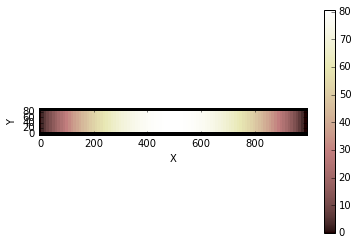

In [6]:
%matplotlib inline
imshow_grid(basic.grid, 'topographic__elevation')

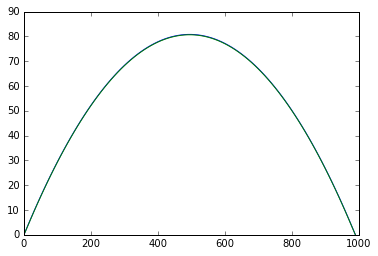

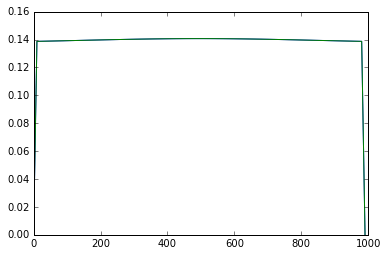

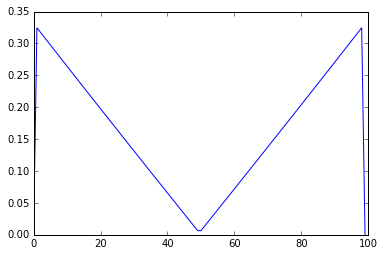

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
        630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
        720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
        810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
        900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,  990.])

In [7]:

topo_profile = basic.grid.at_node['topographic__elevation'][basic.grid.node_y == 50] #+ uplift_rate*elapsed_time
bedrock_profile = basic.grid.at_node['bedrock__elevation'][basic.grid.node_y == 50]
soil_profile = basic.grid.at_node['soil__depth'][basic.grid.node_y == 50]
topo_slope = basic.grid.at_node['topographic__steepest_slope'][basic.grid.node_y == 50]
domain = np.arange(0, max(basic.grid.node_x + 10.0), 10.0)
plt.figure()
plt.plot(domain,topo_profile)
plt.plot(domain, bedrock_profile)
#plt.ylim(0,30)
#plt.xlim(0, 100)
plt.show()

plt.figure()
plt.plot(domain,soil_profile)
plt.plot(domain, topo_profile-bedrock_profile)
#plt.ylim(0,1)
#plt.xlim(0, 100)
plt.figure()
plt.plot(topo_slope)
#plt.ylim(0,1)
#plt.xlim(0, 100)
plt.show()

domain

In [8]:
np.arange(0, max(basic.grid.node_x + 1.0), 1.0)

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

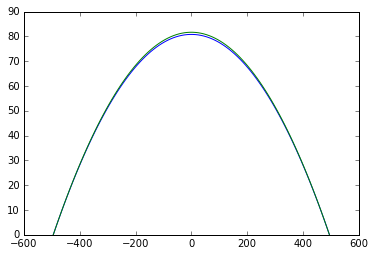

In [9]:
x = np.arange(-max(domain)/2., max(domain)/2. + 10., 10.)
steady_domain = np.arange(-max(domain)/2., max(domain)/2. + 10., 10.)

steady_H = -soil_production_decay_depth*np.log(uplift_rate/max_soil_production_rate)
steady_z_profile_firsthalf = (steady_domain[0:len(domain)/2])**2*uplift_rate/(linear_diffusivity*2*(1-np.exp(-steady_H/soil_transport_decay_depth)))-(uplift_rate*(ncols/2)**2)/(2*linear_diffusivity*(1-np.exp(-steady_H/soil_transport_decay_depth)))
steady_z_profile_secondhalf = -(steady_domain[len(domain)/2:])**2*uplift_rate/(linear_diffusivity*2*(1-np.exp(-steady_H/soil_transport_decay_depth)))+(uplift_rate*(ncols/2)**2)/(2*linear_diffusivity*(1-np.exp(-steady_H/soil_transport_decay_depth)))



steady_z_profile = np.append([-steady_z_profile_firsthalf],[steady_z_profile_secondhalf])
steady_z_profile = steady_z_profile - np.min(steady_z_profile)

#steady_domain = np.append([-domain[len(domain)/2:0]],[domain[0:len(domain)/2]])

%matplotlib inline
plt.plot(steady_domain, topo_profile)
plt.plot(steady_domain,steady_z_profile)

In [10]:
steady_H

0.13862943611198905

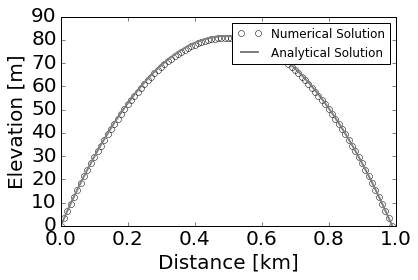

In [18]:
import matplotlib
from matplotlib import ticker
#plotting param
matplotlib.rcParams.update({'font.size': 20})


##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
hillslope = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#parameters
uplift_rate = 0.0005
hillslope_diffusivity = 1.0

#plot the actual profile
domain = np.arange(0, max(basic.grid.node_x + dx), dx)
x = np.arange(-max(domain) / 2., max(domain) / 2. + dx, dx)

hillslope.plot(domain/1000 , topo_profile, marker='o', c='k', linewidth = 0, markerfacecolor='None', label = 'Numerical Solution')

#plot the theoretical profile

plt.plot((x + max(x)) / 1000, steady_z_profile , linestyle='-', c='grey', linewidth = 2, label = 'Analytical Solution')

#axis labels
hillslope.set_xlabel('Distance [km]')
hillslope.set_ylabel('Elevation [m]')

#legend
hillslope.legend(scatterpoints = 1, prop={'size':12})

#save figure
fig.savefig('depth_dependent_topo.eps',bbox_inches='tight', dpi=300)


In [16]:
domain

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
        630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
        720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
        810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
        900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,  990.])